In [ ]:
### 

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [422]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [423]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


# Data Exploration

In [4]:
df.shape

(5110, 12)

In [5]:
round(df.describe()).T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36518.0,21162.0,67.0,17741.0,36932.0,54682.0,72940.0
age,5110.0,43.0,23.0,0.0,25.0,45.0,61.0,82.0
hypertension,5110.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
avg_glucose_level,5110.0,106.0,45.0,55.0,77.0,92.0,114.0,272.0
bmi,4909.0,29.0,8.0,10.0,24.0,28.0,33.0,98.0
stroke,5110.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

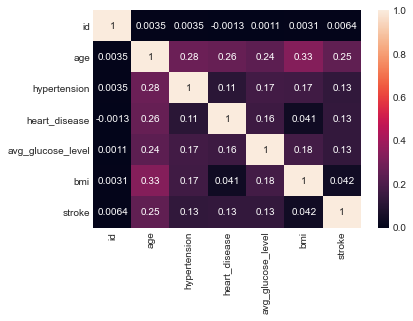

In [9]:
sns.heatmap(df.corr(), annot=True)

### .value_counts() for categorical features - This showes that stroke, hypertension, and heart disease is of higher prevelance in the population over 60.

In [10]:
df.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

(-10.0, 100.0)

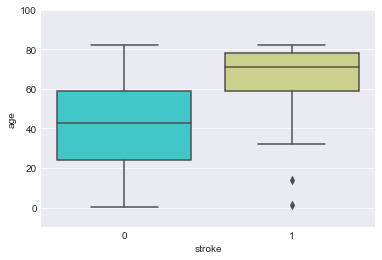

In [11]:
sns.boxplot(x='stroke', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

## 5% of dataset has stroke. The features, hypertension and heart disease were also between 5-10%. This makes this dataset unbalanced.

In [12]:
df.gender.value_counts(normalize=True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

(-10.0, 100.0)

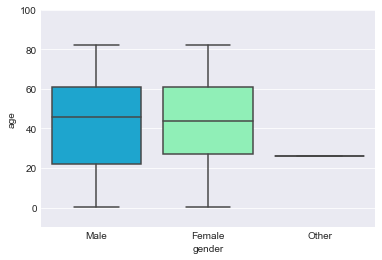

In [13]:
sns.boxplot(x='gender', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

In [14]:
df.hypertension.value_counts(normalize=True)

0    0.902544
1    0.097456
Name: hypertension, dtype: float64

(-10.0, 100.0)

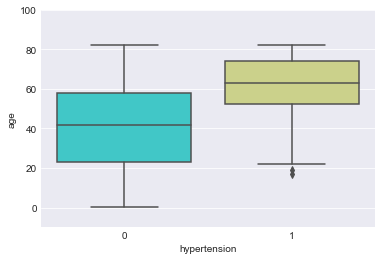

In [15]:
sns.boxplot(x='hypertension', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

In [16]:
df.heart_disease.value_counts(normalize=True)

0    0.945988
1    0.054012
Name: heart_disease, dtype: float64

(-10.0, 100.0)

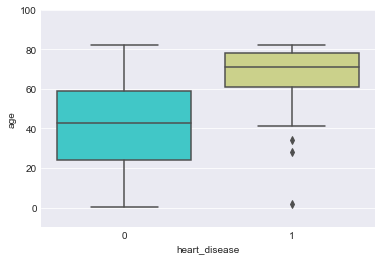

In [17]:
sns.boxplot(x='heart_disease', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

In [18]:
df.smoking_status.value_counts(normalize=True)

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

(-10.0, 100.0)

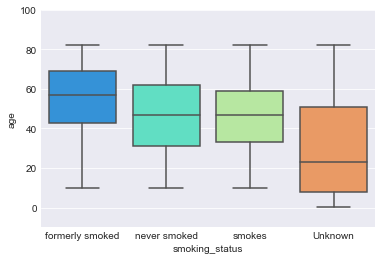

In [19]:
sns.boxplot(x='smoking_status', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

In [20]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

(-10.0, 100.0)

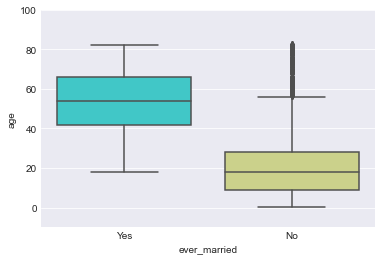

In [21]:
sns.boxplot(x='ever_married', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

In [22]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

(-10.0, 100.0)

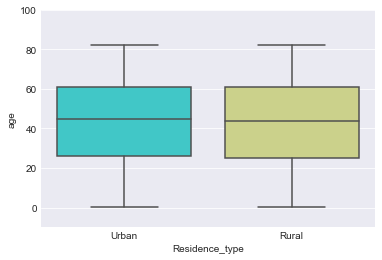

In [23]:
sns.boxplot(x='Residence_type', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

In [24]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

(-10.0, 100.0)

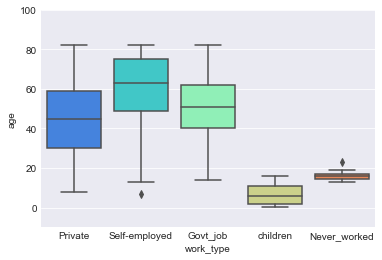

In [25]:
sns.boxplot(x='work_type', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

### Histrograms for numerical features

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

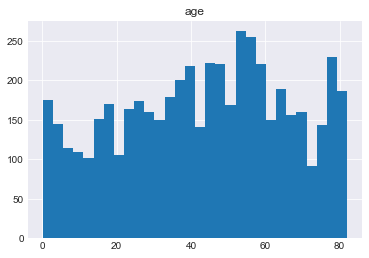

In [26]:
df.hist('age', bins=30)

Text(0, 0.5, 'Amt')

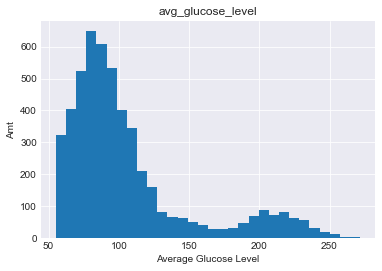

In [27]:
df.hist('avg_glucose_level', bins=30)
plt.xlabel("Average Glucose Level")
plt.ylabel("Amt")

array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

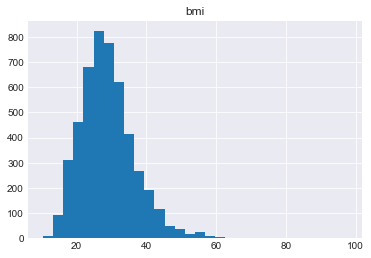

In [28]:
df.hist('bmi', bins=30)

C:\Users\ariel\Documents\Dahlia\Data_Sc\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

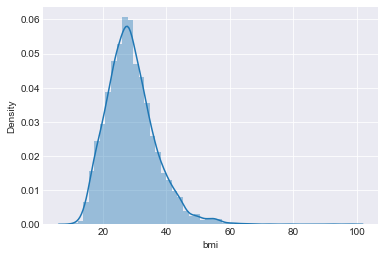

In [29]:
sns.distplot(df['bmi'], kde=True)

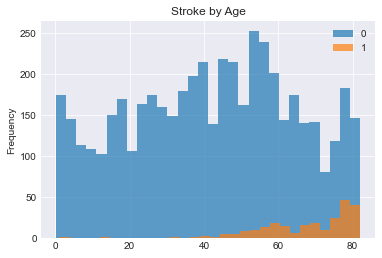

In [30]:
df.groupby('stroke')['age'].plot(kind='hist', bins=30, legend=True,
                                             alpha=0.7, title='Stroke by Age' )
plt.show()

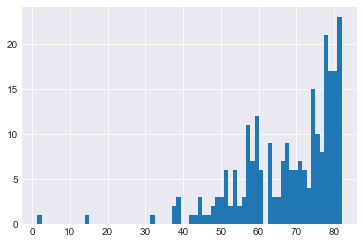

In [31]:
df_stroke = df[df.stroke==1]
plt.hist(df_stroke.age, bins=70)
plt.show()

### Stroke rises with age and is barely visible under the age of 40.

# Stroke DF Data Cleaning

### 1. Gender Feature

In [32]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [33]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [34]:
df[df['gender']=='Other'].index

Int64Index([], dtype='int64')

In [35]:
df['gender'].replace({'Male':1, 'Female':2},  inplace=True)

### 2. Stroke and Age - cleaning outliers

(-10.0, 100.0)

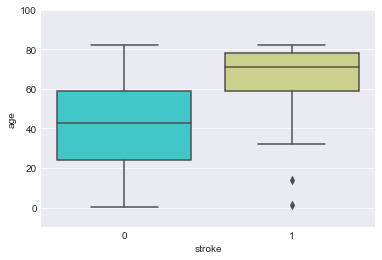

In [36]:
sns.boxplot(x='stroke', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

In [37]:
df.query('age < 20 and stroke==1')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,2,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,2,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [38]:
df.drop(index=[162, 245], axis=0, inplace=True)

(-10.0, 100.0)

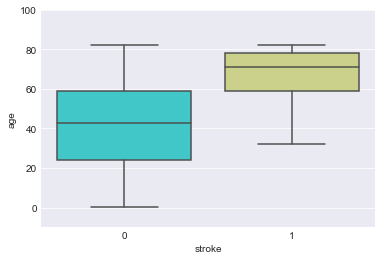

In [39]:
sns.boxplot(x='stroke', y='age', data=df, palette='rainbow')
plt.ylim(-10,100)

### 3. Changing the Nan in the BMI feature to the BMI average, according average BMI in average age bins.

<AxesSubplot:>

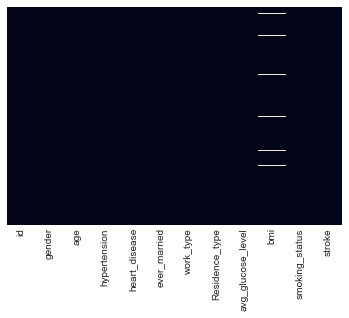

In [40]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [41]:
df.age.max()

82.0

In [42]:
bins = [0, 40, 45, 50, 55, 60, 65, 70, 75, 82]
df['age_group']=pd.cut(df.age, bins)
df[['id', 'age', 'age_group']].sample(5)


,id,age,age_group
2762,40264,17.0,"(0, 40]"
3377,71099,51.0,"(50, 55]"
2670,4727,33.0,"(0, 40]"
3369,54294,65.0,"(60, 65]"
4296,21677,64.0,"(60, 65]"


In [43]:
age_group_to_meanbmi = df.groupby('age_group').mean()['bmi']
age_group_to_meanbmi

age_group
(0, 40]     26.430660
(40, 45]    31.656198
(45, 50]    31.185552
(50, 55]    32.074402
(55, 60]    31.682353
(60, 65]    31.136420
(65, 70]    30.714167
(70, 75]    29.963063
(75, 82]    28.409513
Name: bmi, dtype: float64

<AxesSubplot:>

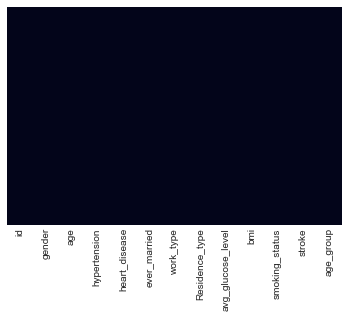

In [44]:
age_group_to_meanbmi = df.groupby('age_group').mean()['bmi']
for index, column in df.iterrows():
    if np.isnan(column.bmi):
        mean_bmi = column.age_group
        df.loc[index, 'bmi'] = age_group_to_meanbmi[mean_bmi]

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### 4. DF over 40 - making dataset more balanced.

In [478]:
df_over_40 = df[df.age >= 40]
df_over_40.sample()
#df_over_40.shape

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4052,768,Female,74.0,0,0,Yes,Self-employed,Urban,68.18,27.3,formerly smoked,0


In [481]:
df_over_40.stroke.value_counts()

0    2699
1     241
Name: stroke, dtype: int64

### 5. Turning smoking to a numerical feature using dummy

In [46]:
dummy_smoker = pd.get_dummies(df.smoking_status, drop_first=False, prefix='Smoker')
dummy_smoker.head()

,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [47]:
dummy_smoker.shape, df.shape

((5107, 4), (5107, 13))

In [48]:
df = pd.concat([df, dummy_smoker], axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,"(65, 70]",0,1,0,0
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,31.13642,never smoked,1,"(60, 65]",0,0,1,0
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,"(75, 82]",0,0,1,0
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,"(45, 50]",0,0,0,1
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,"(75, 82]",0,0,1,0


In [49]:
#make a class for all of the function

In [424]:
def clean_data(df: pd.DataFrame):
    
    #remove unknown gender (single row)
    df.drop(df[df['gender']=='Other'].index,inplace=True)
    
    #turning the gender feature from a string to numerical
    df['gender'].replace({'Male':1, 'Female':2},  inplace=True)
    
    # removing age outliers for stroke
    df.drop(index=[162, 245], axis=0, inplace=True)
    
    #placing bmi average/age to missing bmi values
    bins = [0, 40, 45, 50, 55, 60, 65, 70, 75, 82]
    pd.cut(df.age, bins)
    df['age_group']=pd.cut(df.age, bins)
    age_group_to_meanbmi = df.groupby('age_group').mean()['bmi']
    for index, column in df.iterrows():
        if np.isnan(column.bmi):
            mean_bmi = column.age_group
            df.loc[index, 'bmi'] = age_group_to_meanbmi[mean_bmi]
            
    #limiting the age to 40 and up.
    df = df[df.age >= 40]
    
    #making smoking statues a numerical feature
    dummy_smoker = pd.get_dummies(df.smoking_status, drop_first=False, prefix='Smoker')
    df = pd.concat([df, dummy_smoker], axis=1)
    

    
    
    return df
    #df.to_csv(/Users/dahliashamir/Documents/Dahlia/John_Bryce/Data_for_project/df_final.csv)

### Data cleaning function

In [425]:
df_raw = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [426]:
df_final = clean_data(df_raw)

In [427]:
df_final.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,"(65, 70]",0,1,0,0
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,31.13642,never smoked,1,"(60, 65]",0,0,1,0
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,"(75, 82]",0,0,1,0
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,"(45, 50]",0,0,0,1
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,"(75, 82]",0,0,1,0


In [8]:
df_final.shape

(2940, 17)

# Data Analysis

In [9]:
df_final.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group', 'Smoker_Unknown',
       'Smoker_formerly smoked', 'Smoker_never smoked', 'Smoker_smokes'],
      dtype='object')

### The feature with the most visible correlation with stroke is age, glucose levels and BMI. 

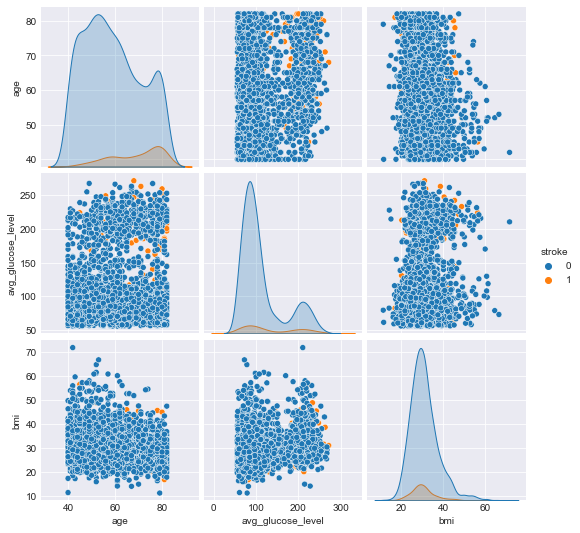

In [10]:
sns.pairplot(df_final[['age', 'avg_glucose_level', 'bmi', 'stroke',]], hue='stroke')

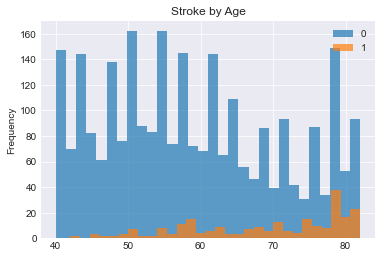

In [57]:
df_final.groupby('stroke')['age'].plot(kind='hist', bins=30, legend=True,
                                             alpha=0.7, title='Stroke by Age' )
plt.show()

### Bar Plots:  Differences were slight between the stroke and non-stroke populations. However, many of these features (stroke included) were unbalanced.

gender
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: bmi, dtype: object

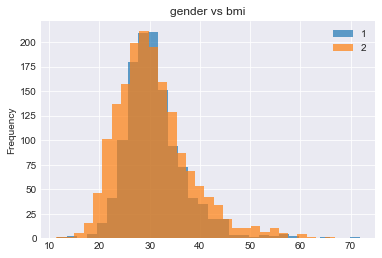

In [58]:
df_final.groupby('gender')['bmi'].plot(kind='hist', bins=30, legend=True,
                                             alpha=0.7, title='gender vs bmi' )

<AxesSubplot:xlabel='stroke'>

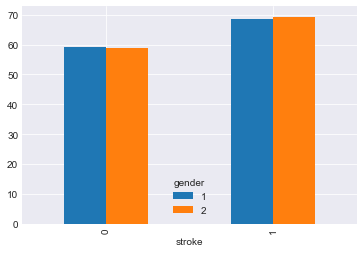

In [59]:
df_final.groupby(['stroke', 'gender']).age.mean().unstack().plot.bar(grid=True)

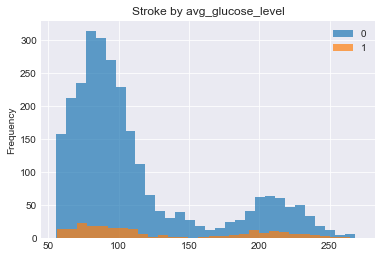

In [60]:
df_final.groupby('stroke')['avg_glucose_level'].plot(kind='hist', bins=30, legend=True,
                                             alpha=0.7, title='Stroke by avg_glucose_level' )
plt.show()

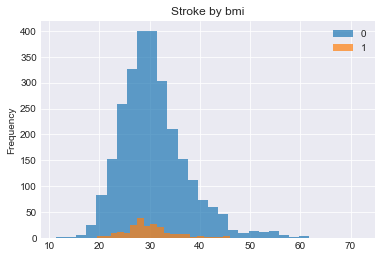

In [61]:
df_final.groupby('stroke')['bmi'].plot(kind='hist', bins=30, legend=True,
                                             alpha=0.7, title='Stroke by bmi' )
plt.show()

<AxesSubplot:xlabel='stroke'>

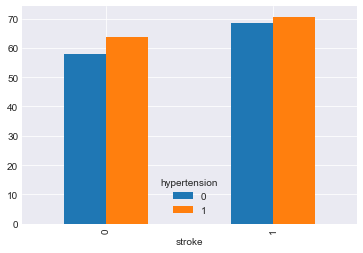

In [62]:
df_final.groupby(['stroke', 'hypertension']).age.mean().unstack().plot.bar(grid=True)

<AxesSubplot:xlabel='stroke'>

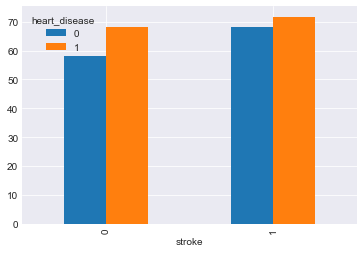

In [63]:
df_final.groupby(['stroke', 'heart_disease']).age.mean().unstack().plot.bar(grid=True)

<AxesSubplot:xlabel='smoking_status'>

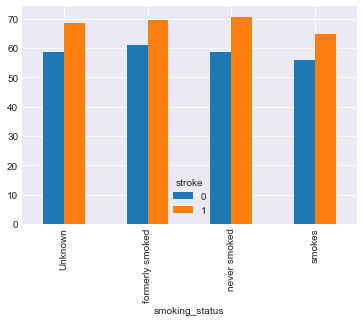

In [64]:
df_final.groupby(['smoking_status', 'stroke']).age.mean().unstack().plot.bar(grid=True)

In [65]:
df_final.groupby('stroke')['smoking_status'].value_counts(normalize=True)

stroke  smoking_status 
0       never smoked       0.397184
        formerly smoked    0.235272
        Unknown            0.191552
        smokes             0.175991
1       never smoked       0.369295
        formerly smoked    0.282158
        Unknown            0.186722
        smokes             0.161826
Name: smoking_status, dtype: float64

### Less informative features: work type, marital status, residence type.

<AxesSubplot:xlabel='work_type'>

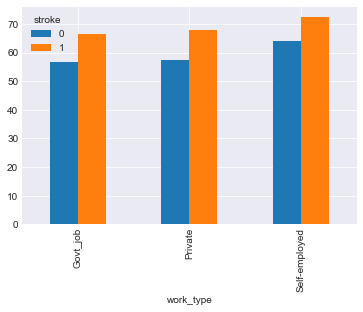

In [66]:
df_final.groupby(['work_type', 'stroke']).age.mean().unstack().plot.bar(grid=True)

<AxesSubplot:xlabel='stroke'>

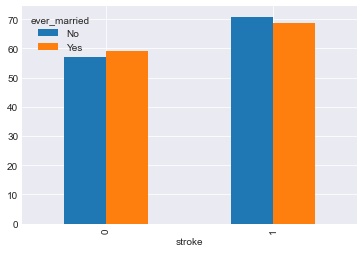

In [67]:
df_final.groupby(['stroke', 'ever_married']).age.mean().unstack().plot.bar(grid=True)

<AxesSubplot:xlabel='stroke'>

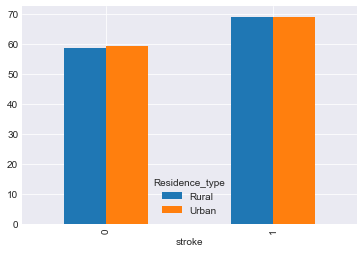

In [68]:
df_final.groupby(['stroke', 'Residence_type']).age.mean().unstack().plot.bar(grid=True)

# Training the stroke model

In [483]:
df_final.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1,"(65, 70]",0,1,0,0
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,31.13642,never smoked,1,"(60, 65]",0,0,1,0
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1,"(75, 82]",0,0,1,0
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1,"(45, 50]",0,0,0,1
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1,"(75, 82]",0,0,1,0


In [484]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import VotingClassifier
import statistics as stat

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score

In [485]:
df_final.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group', 'Smoker_Unknown',
       'Smoker_formerly smoked', 'Smoker_never smoked', 'Smoker_smokes'],
      dtype='object')

## Features found to be of significance in the Data Analysis


In [486]:
X_features = ['gender','age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'Smoker_Unknown', 'Smoker_formerly smoked',
       'Smoker_never smoked', 'Smoker_smokes']
X_features_small = ['age', 'avg_glucose_level', 'bmi']

### Early Model tests

In [487]:
logistic = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=10)
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier(n_estimators=100,min_samples_leaf=2)

model = dtree


X = df_final[X_features]
y = df_final.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Original Train

In [488]:
y_pred = model.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[1819,    0],
       [   0,  150]], dtype=int64)

In [489]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1819
           1       1.00      1.00      1.00       150

    accuracy                           1.00      1969
   macro avg       1.00      1.00      1.00      1969
weighted avg       1.00      1.00      1.00      1969



### Model test

In [490]:
y_pred_test = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[825  55]
 [ 80  11]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       880
           1       0.17      0.12      0.14        91

    accuracy                           0.86       971
   macro avg       0.54      0.53      0.53       971
weighted avg       0.84      0.86      0.85       971



### Using dtree train was overfit and test was low. Yet it was the most effective of the classifiers.  

In [491]:
df_final.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group', 'Smoker_Unknown',
       'Smoker_formerly smoked', 'Smoker_never smoked', 'Smoker_smokes'],
      dtype='object')

In [492]:
X_features = ['gender','age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'Smoker_Unknown', 'Smoker_formerly smoked',
       'Smoker_never smoked', 'Smoker_smokes']
X_features_small = ['age', 'avg_glucose_level', 'bmi']

In [493]:
logistic = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=10)
#weights = {0:10, 1:90}
dtree = DecisionTreeClassifier(ccp_alpha = 0.0053, class_weight='balanced', criterion='gini', 
                               random_state=42, max_depth=120, min_samples_split=8, min_samples_leaf=2, splitter='best')
#rforest = RandomForestClassifier(n_estimators=1600, random_state=42,  min_samples_split=2,
 #min_samples_leaf=4, max_features='sqrt', max_depth=10, bootstrap= True)
rforest = RandomForestClassifier(bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, 
                                 min_samples_split=8, n_estimators=100)


model = dtree

In [494]:
X = df_final[X_features]
y = df_final.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0053, class_weight='balanced', max_depth=120,
                       min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

## Finding the features of greatest importance.

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.57320
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.04110
Feature: 4, Score: 0.12066
Feature: 5, Score: 0.20799
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.05705
Feature: 9, Score: 0.00000


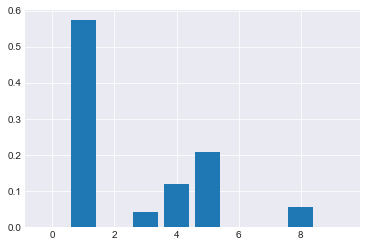

In [495]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Training the Decision Tree

In [497]:
y_pred = model.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[1096,  723],
       [  20,  130]], dtype=int64)

In [498]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.60      0.75      1819
           1       0.15      0.87      0.26       150

    accuracy                           0.62      1969
   macro avg       0.57      0.73      0.50      1969
weighted avg       0.92      0.62      0.71      1969



# Test Decision Tree Model

In [499]:
y_pred_test = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[512 368]
 [ 14  77]]
              precision    recall  f1-score   support

           0       0.97      0.58      0.73       880
           1       0.17      0.85      0.29        91

    accuracy                           0.61       971
   macro avg       0.57      0.71      0.51       971
weighted avg       0.90      0.61      0.69       971



# METHOD 1 - down sample the majority

In [444]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes,stroke
2250,2,78.0,0,1,107.18,28.2,0,0,1,0,0
3080,2,74.0,0,0,83.58,18.2,0,0,1,0,0
403,2,52.0,0,0,80.88,23.8,0,0,0,1,0
2204,2,80.0,0,1,103.06,28.8,0,0,1,0,0
2913,2,44.0,1,0,105.77,36.8,0,0,1,0,0


In [445]:
df_method1_0 = df_train[df_train['stroke'] == 0]
df_method1_1 = df_train[df_train['stroke'] == 1]
df_method1_0.shape, df_method1_1.shape

((1819, 11), (150, 11))

In [446]:
df_method1 = pd.concat([df_method1_0[:500],  df_method1_1,  df_method1_0[1001:1500],    df_method1_1])
df_method1.shape

(1299, 11)

In [447]:
df_method1.stroke.value_counts()

0    999
1    300
Name: stroke, dtype: int64

In [448]:
X_train = df_method1.drop('stroke',axis=1)
y_train = df_method1['stroke']
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0053, class_weight='balanced', max_depth=120,
                       min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

In [449]:
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[676 323]
 [ 54 246]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       999
           1       0.43      0.82      0.57       300

    accuracy                           0.71      1299
   macro avg       0.68      0.75      0.67      1299
weighted avg       0.81      0.71      0.73      1299



In [450]:
y_pred_test = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[576 304]
 [ 26  65]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.78       880
           1       0.18      0.71      0.28        91

    accuracy                           0.66       971
   macro avg       0.57      0.68      0.53       971
weighted avg       0.88      0.66      0.73       971



# Method 2 RandomOverSampler:

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
X_ros.shape

(3638, 10)

In [452]:
sum(y_ros==1), sum(y_ros==0)

(1819, 1819)

In [453]:
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[1197  622]
 [  27  123]]
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1819
           1       0.17      0.82      0.27       150

    accuracy                           0.67      1969
   macro avg       0.57      0.74      0.53      1969
weighted avg       0.92      0.67      0.75      1969



In [454]:
y_pred_test = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[576 304]
 [ 26  65]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.78       880
           1       0.18      0.71      0.28        91

    accuracy                           0.66       971
   macro avg       0.57      0.68      0.53       971
weighted avg       0.88      0.66      0.73       971



# SMOTE

In [455]:
X_resampled, y_resampled = SMOTE(k_neighbors=2).fit_resample(X_train, y_train)
model.fit(X_resampled,y_resampled)

DecisionTreeClassifier(ccp_alpha=0.0053, class_weight='balanced', max_depth=120,
                       min_samples_leaf=2, min_samples_split=8,
                       random_state=42)

In [456]:
y_pred_train = model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[1517  302]
 [  82   68]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1819
           1       0.18      0.45      0.26       150

    accuracy                           0.80      1969
   macro avg       0.57      0.64      0.57      1969
weighted avg       0.89      0.80      0.84      1969



In [457]:
y_pred_test = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[728 152]
 [ 58  33]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.87       880
           1       0.18      0.36      0.24        91

    accuracy                           0.78       971
   macro avg       0.55      0.59      0.56       971
weighted avg       0.86      0.78      0.81       971



# Decision Tree Random Grid Search

In [458]:
dtree = DecisionTreeClassifier()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rforest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# Cost complexity pruning - Hyperparameter tuning 

In [464]:
# ccp_alpha - Cost complexity pruning provides an option (other than max_depth and min_samples_leaf) 
#to control the size of a tree. 
ccp_alpha = 0.00437083
# class-weight for moderately imbalanced data WITH noise and strongly imbalanced, using "balanced" as the 
# Heuristic (best practice) approach you capture more true events (higher TRUE recall).
# This worked better than giving it weights={0:1.0, 1:100.0} or any other ratio tested
class_weight = 'balanced'
#criterion - 'gini' was better than 'entropy' (although the precision was slightly beter with entropy)
criterion =['gini', 'entropy']
#max_depth - found in grid search - in practice it did not have much effect
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
dtree_random_grid = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
pprint(dtree_random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 5, 8, 10]}


In [465]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtree = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = dtree_random_grid, n_iter = 100, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtree_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 8, 10]},
                   random_state=42, verbose=2)

In [466]:
#These features were far less significant
dtree_random.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}

In [467]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

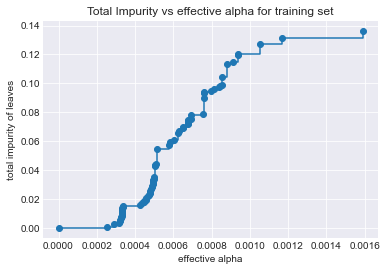

In [468]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [469]:
#Next, we train a decision tree using the effective alphas. 
#The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.
dtrees = []
for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtree.fit(X_train, y_train)
    dtrees.append(dtree)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dtrees[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.004370838440893476


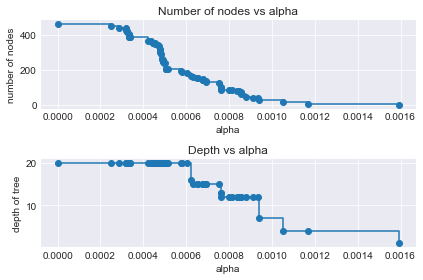

In [470]:
#number of nodes and tree depth decreases as alpha increases
dtrees = dtrees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dtree.tree_.node_count for dtree in dtrees]
depth = [dtree.tree_.max_depth for dtree in dtrees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

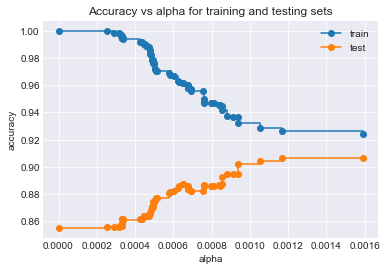

In [471]:
train_scores = [dtree.score(X_train, y_train) for dtree in dtrees]
test_scores = [dtree.score(X_test, y_test) for dtree in dtrees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## The ccp-alpha hyperparameter tuning gave the ideal result for highest accuracy.
## But we needed to optimize the recall.

In [472]:
from sklearn.metrics import recall_score

In [473]:
recall_score(y_train, y_pred)

0.82

In [474]:
recall_score(y_test, y_pred_test)

0.3626373626373626

In [475]:
from sklearn.metrics import recall_score

alphas = [0.001, 0.0013, 0.0017, 0.002, 0.0023, 0.0027, 0.003, 0.0033, 0.0037, 
         0.004, 0.0043, 0.0047, 0.005, 0.0053, 0.0057, 0.006, 0.01]

train_recall_scores = []
test_recall_scores = []

for alpha in alphas:
    dtree = DecisionTreeClassifier(ccp_alpha = alpha, class_weight='balanced', criterion='gini', 
                               random_state=42, max_depth=120, min_samples_split=8, min_samples_leaf=2, splitter='best')
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_train)
    train_recall_score = recall_score(y_train, y_pred)
    train_recall_scores.append(train_recall_score)
    
    y_pred_test = dtree.predict(X_test)
    test_recall_score = recall_score(y_test, y_pred_test)
    test_recall_scores.append(test_recall_score)
    


In [476]:
train_recall_scores, test_recall_scores

([1.0,
  1.0,
  1.0,
  0.9933333333333333,
  0.9533333333333334,
  0.9533333333333334,
  0.9466666666666667,
  0.9333333333333333,
  0.8866666666666667,
  0.8866666666666667,
  0.86,
  0.8266666666666667,
  0.86,
  0.8666666666666667,
  0.82,
  0.82,
  0.8666666666666667],
 [0.24175824175824176,
  0.34065934065934067,
  0.38461538461538464,
  0.38461538461538464,
  0.6153846153846154,
  0.6813186813186813,
  0.6373626373626373,
  0.6043956043956044,
  0.6923076923076923,
  0.7142857142857143,
  0.7142857142857143,
  0.7142857142857143,
  0.7252747252747253,
  0.8461538461538461,
  0.8241758241758241,
  0.8241758241758241,
  0.8901098901098901])

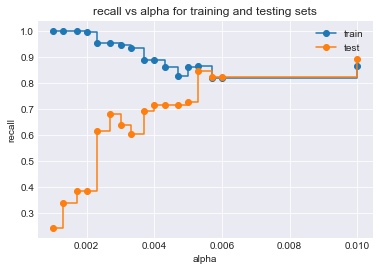

In [477]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("recall vs alpha for training and testing sets")
ax.plot(alphas, train_recall_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(alphas, test_recall_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## *** The graph showes that the ideal ccp_alpha for both train and test was 0.0053 

### The decision tree and the random forest classiffiers were overfit. 
### GridSearchCV was used to find the most significant hyperparameters.
## Decision Tree Param Grid Search

In [60]:
param_grid = { 'criterion':['gini','entropy'], 
              'splitter' : ["best", "random"],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 
              'min_samples_leaf': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [62]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=4, s

[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/5] END criteri

[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, m

[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 3/5] END criteri

[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 5/5] END criterio

[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 4/5] END criteri

[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini

[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 5/5] END criteri

[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini

[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 4/5] END criteri

[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 4/5] END criterion

[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 5/5] END cri

[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=11, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=11, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=12, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=12, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=12, splitter=best; total time=   0.0s
[CV 4/5] E

[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/5] END criteri

[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/5] E

[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/5] END criteri

[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/5] E

[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/5] END criteri

[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 3/5] E

[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 4/5] END criteri

[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 2/5] E

[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/5] END criteri

[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=30, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=30, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=30, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=30, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 3/5] E

[CV 2/5] END criterion=gini, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=40, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/5] END c

[CV 2/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=40, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=40, min_samples_leaf=150, splitter=best; total time=   0.0s


[CV 3/5] END criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=50, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=50, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=50, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=50, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=50, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=50, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=50, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/5] E

[CV 2/5] END criterion=gini, max_depth=50, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=50, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=50, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=50, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/5] END

[CV 1/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=70, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/5] E

[CV 5/5] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 5/5] END criteri

[CV 3/5] END criterion=gini, max_depth=90, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=90, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=90, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=90, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=90, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/5] E

[CV 2/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=120, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=120, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/5] E

[CV 1/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=120, min_samples_leaf=70, splitter=random; total time=   0.0s


[CV 5/5] END criterion=gini, max_depth=150, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=150, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=150, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=150, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=150, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=150, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=150, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 5/5] E

[CV 5/5] END criterion=gini, max_depth=150, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=best; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=150, min_samples_leaf=70, splitter=random; total time=   0.0s


[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=10, splitter=best; total time=   0.0s

[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=70, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random; total tim

[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=11, splitter=best; total tim

[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=150, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=150, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=150, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=150, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=150, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=150, splitter=random;

[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, min_samples_leaf=12, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, min_samples_leaf=12, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, min_samples_leaf=12, splitter=best; total tim

[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=5, splitter=best; total time=   0.0s


[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, min_samples_leaf=30, splitter=random; total tim

[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=7, splitter=best; total time=   0.0s


[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, min_samples_leaf=50, splitter=best; total tim

[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=9, splitter=best; total time=   0.0s


[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, min_samples_leaf=120, splitter=best; total ti

[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=11, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=11, splitter=best;

[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=150, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=150, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=150, spli

[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best;

[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=150, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, min_samples_leaf=150, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=4, splitter=bes

[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=12, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, min_samples_leaf=15, splitter=best;

[CV 1/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=5, splitter=random; total tim

[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best;

[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=6, splitter=random; total tim

[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, min_samples_leaf=40, splitter=best;

[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=7, splitter=best; total tim

[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=30, min_samples_leaf=50, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=30, min_samples_leaf=70, splitter=best;

[CV 4/5] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=40, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=40, min_samples_leaf=10, splitter=best; total 

[CV 2/5] END criterion=entropy, max_depth=40, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=40, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=40, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=40, min_samples_leaf=90, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=40, min_samples_leaf=120, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=40, min_samples_leaf=120, splitter=r

[CV 4/5] END criterion=entropy, max_depth=50, min_samples_leaf=11, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=50, min_samples_leaf=11, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=50, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=50, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=50, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=50, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=50, min_samples_leaf=11, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=best;

[CV 3/5] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=best; total tim

[CV 3/5] END criterion=entropy, max_depth=70, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=70, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=70, min_samples_leaf=15, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=70, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=70, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=70, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=70, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=70, min_samples_leaf=15, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=70, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=70, min_samples_leaf=20, splitter=best;

[CV 1/5] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=90, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=90, min_samples_leaf=6, splitter=best; total tim

[CV 4/5] END criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=90, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=90, min_samples_leaf=30, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=90, min_samples_leaf=30, splitter=best;

[CV 1/5] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=120, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best;

[CV 2/5] END criterion=entropy, max_depth=120, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=120, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=120, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=120, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=120, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=120, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=120, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=120, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=120, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=120, min_samples_leaf=40, splitt

[CV 3/5] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=150, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=150, min_samples_leaf=8, splitter=best;

[CV 4/5] END criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=150, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=150, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=150, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=150, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=150, min_samples_leaf=40, splitter=best; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=150, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=150, min_samples_leaf=40, splitter=random; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=150, min_samples_leaf=40, splitt

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                              20, 30, 40, 50, 70, 90, 120,
                                              150],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=3)

In [63]:
# The best score:
#[CV]  criterion="gini", max_depth=8, min_samples_leaf=5, splitter=best, score=0.233, total=   0.0s
#[CV] criterion=gini, max_depth=8, min_samples_leaf=5, splitter=best ..

In [64]:
grid.best_score_, 


(0.17304278797857547,)

In [65]:
grid.best_params_, 

({'criterion': 'entropy',
  'max_depth': 70,
  'min_samples_leaf': 5,
  'splitter': 'best'},)

In [66]:
grid.scorer_

make_scorer(f1_score, average=binary)

In [24]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='recall', refit=True,verbose=3)
grid.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, ma

[CV]  criterion=gini, max_depth=4, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=10

[CV]  criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=50, splitter=best .
[CV]  criterion=gini, max_depth=4, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_sampl

[CV]  criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=5, m

[CV]  criterion=gini, max_depth=5, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=9, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=9, splitter=best ..
[CV]  criterion=gini, max_depth=5, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=9, s

[CV]  criterion=gini, max_depth=5, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best, score=0.000, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=5, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=30, 

[CV]  criterion=gini, max_depth=5, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, split

[CV]  criterion=gini, max_depth=6, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best ..
[CV]  criterion=gini, max_depth=6, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=9, split

[CV]  criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=6, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=30, splitter=random 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=30,

[CV]  criterion=gini, max_depth=6, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_lea

[CV]  criterion=gini, max_depth=7, min_samples_leaf=8, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=9,

[CV]  criterion=gini, max_depth=7, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best .
[CV]  criterion=gini, max_depth=7, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=30, 

[CV]  criterion=gini, max_depth=7, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best, score=0.100, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best ..
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_l

[CV]  criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best ..
[CV]  criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best ..
[CV]  criterion=gini, max_depth=8, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=9, spl

[CV]  criterion=gini, max_depth=8, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20, splitter=best .
[CV]  criterion=gini, max_depth=8, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples

[CV]  criterion=gini, max_depth=8, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=90, splitter=random 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_le

[CV]  criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best ..
[CV]  criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best ..
[CV]  criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best ..
[CV]  criterion=gini, max_depth=9, min_samples_leaf=7, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=7, split

[CV]  criterion=gini, max_depth=9, min_samples_leaf=12, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=12, splitter=best .
[CV]  criterion=gini, max_depth=9, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=12, splitter=best .
[CV]  criterion=gini, max_depth=9, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_le

[CV]  criterion=gini, max_depth=9, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=50, splitter=best .
[CV]  criterion=gini, max_depth=9, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples

[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, splitter=random, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best .
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best, score=0.133, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best .
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best, score=0.100, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best .
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_le

[CV]  criterion=gini, max_depth=10, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=11, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, 

[CV]  criterion=gini, max_depth=10, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=40, splitter=best 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, 

[CV]  criterion=gini, max_depth=10, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=11, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=8, splitter=best .
[CV]  criterion=gini, max_depth=11, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_sample

[CV]  criterion=gini, max_depth=11, min_samples_leaf=15, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=15, splitter=best 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=15, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, 

[CV]  criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=90, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=90, splitter=random 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_

[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, splitter=best .
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, splitter=best .
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=6, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_l

[CV]  criterion=gini, max_depth=12, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=12, splitter=best 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, 

[CV]  criterion=gini, max_depth=12, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=70, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=70, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=70, splitter=random 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=12, min_

[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=6, splitter=best .
[CV]  criterion=gini, max_depth=15, min_samples_leaf=6, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=6, splitter=best .
[CV]  criterion=gini, max_depth=15, min_samples_leaf=6, splitter=best, score=0.133, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=6, splitter=best .
[CV]  criterion=gini, max_depth=15, min_samples_leaf=6, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_le

[CV]  criterion=gini, max_depth=15, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=12, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, 

[CV]  criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=70, splitter=random 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_

[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=5, splitter=random, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=6, splitter=best .
[CV]  criterion=gini, max_depth=20, min_samples_leaf=6, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samp

[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_le

[CV]  criterion=gini, max_depth=20, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=40, splitter=best 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=20, 

[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, splitter=best .
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, splitter=best .
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_l

[CV]  criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=10, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=10, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=30, min_sam

[CV]  criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=30, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_

[CV]  criterion=gini, max_depth=30, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=120, splitter=random 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=30,

[CV]  criterion=gini, max_depth=40, min_samples_leaf=8, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=8, splitter=best .
[CV]  criterion=gini, max_depth=40, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=8, splitter=best .
[CV]  criterion=gini, max_depth=40, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_l

[CV]  criterion=gini, max_depth=40, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=40, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=40, min_

[CV]  criterion=gini, max_depth=50, min_samples_leaf=7, splitter=best, score=0.133, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=7, splitter=best .
[CV]  criterion=gini, max_depth=50, min_samples_leaf=7, splitter=best, score=0.100, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=7, splitter=best .
[CV]  criterion=gini, max_depth=50, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=7, splitter=best .
[CV]  criterion=gini, max_depth=50, min_samples_leaf=7, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=7, splitter=random 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf

[CV]  criterion=gini, max_depth=50, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=12, splitter=best 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, 

[CV]  criterion=gini, max_depth=50, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_samples_leaf=70, splitter=best 
[CV]  criterion=gini, max_depth=50, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=50, min_sa

[CV]  criterion=gini, max_depth=70, min_samples_leaf=6, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=6, splitter=best .
[CV]  criterion=gini, max_depth=70, min_samples_leaf=6, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=6, splitter=random 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=6, splitter=random 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=6, splitter=random 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=6, splitter=random 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_sample

[CV]  criterion=gini, max_depth=70, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=12, splitter=best 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=12, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=12, splitter=best 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=12, splitter=best 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=12, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=70, min_sa

[CV]  criterion=gini, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=50, splitter=best 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=50, splitter=best 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=50, splitter=best 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=70, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=70, min_samp

[CV]  criterion=gini, max_depth=90, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best .
[CV]  criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best, score=0.167, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best .
[CV]  criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best, score=0.200, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best .
[CV]  criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best, score=0.100, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best .
[CV]  criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best .
[CV]  criterion=gini, max_depth=90, min_samples_leaf=5, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=5, 

[CV]  criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best, score=0.067, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=10, splitter=random 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_

[CV]  criterion=gini, max_depth=90, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=50, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=50, splitter=best 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=90, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=90, min_

[CV]  criterion=gini, max_depth=120, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=12, splitter=best 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=12, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=120, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=50, splitter=best 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=50, splitter=best 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=50, splitter=best 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=120, min_samples_leaf=50, splitter=random 
[CV]  criterion=gini, max_depth=120, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=1

[CV]  criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=4, splitter=random, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=5, splitter=best, score=0.133, total=   0.0s
[CV] criterion=gini, max_depth=15

[CV]  criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=10, splitter=best, score=0.033, total=   0.0s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=150, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, mi

[CV]  criterion=gini, max_depth=150, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=120, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=120, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=120, splitter=random 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=gini, max_depth=150, min_samples_leaf=150, splitter=best 
[CV]  criterion=gini, max_depth=150, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=15, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=15, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entr

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=best 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterio

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5,

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=random 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=6, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=en

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=50, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=50, splitter=best 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=best, score=0.100, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entro

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, m

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=50, splitter=best 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criter

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, 

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=30, splitter=best 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=30, splitter=best 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=30, splitter=best 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=30, splitter=best 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy,

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=15, splitter=random, score=0.000, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=150, splitter=best 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=150, splitter=best 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV]

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=8, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, m

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] c

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=120, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=150, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=150, splitter=best 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=150, splitter=best, score=0.000, total= 

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=7, splitter=random, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=8, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entr

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=15, splitter=best, score=0.000, total=   0.0s
[CV] criterion=e

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=random 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=random 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=random 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] c

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, splitter=random, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, splitter=random, score=0.100, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=6, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=6, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=6, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=6, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entr

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=random 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=random 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=11, splitter=best, score=0.067, total=   0.0s
[CV] cri

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, splitter=best, score=0.133, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, splitter=best, score=0.100, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, splitter=best, score=0.033, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=11, splitter=best, score=0.000, total=   0.0s
[CV] criterion=e

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] c

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=150, splitter=random, score=0.000, t

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best, score=0.133, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[C

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=90, splitter=random 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=120, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=120, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=120, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=120, splitter=best 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV]

[CV]  criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=best, score=0.100, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=best, score=0.100, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] c

[CV]  criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=random 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=70, splitter=random, score=0.000, total=   0.0s
[CV] crite

[CV]  criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=6, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=

[CV]  criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0

[CV]  criterion=entropy, max_depth=50, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=50, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=50, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=50, splitter=random 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=50, min_samples_leaf=70, splitter=best 
[CV]  criterion=entropy, max_depth=50, min_samples_leaf=70, splitter=best, score=0.000, total=   0.0s
[CV]

[CV]  criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=70, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=11, splitter=random 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=11, splitter=random 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=11, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=12, splitter=best 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=12, splitter=best 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=12, splitter=best 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=12, splitter=best, score=0.033, total=   0.0s
[CV] cri

[CV]  criterion=entropy, max_depth=70, min_samples_leaf=40, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best 
[CV]  criterion=entropy, max_depth=70, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=e

[CV]  criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=random, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=4, splitter=random, score=0.067, total=   0.0s
[CV] criterio

[CV]  criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=9, splitter=random, score=0.000, total=   0.0s
[CV] crit

[CV]  criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=20, splitter=random, score=0.000, total=   0.0

[CV]  criterion=entropy, max_depth=90, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=90, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=90, splitter=random 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=90, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=120, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=120, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=90, min_samples_leaf=120, splitter=best 
[CV]  criterion=entropy, max_depth=90, min_samples_leaf=120, splitter=best, score=0.000, total=   0.0s
[C

[CV]  criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best, score=0.100, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=random 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=7, splitter=random, score=0.000, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=best 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=best 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=best 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=random 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=12, splitter=random, score=0.000, total=   0.0s

[CV]  criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random 
[CV]  criterion=entropy, max_depth=120, min_samples_leaf=50, splitter=random, score=0.000, t

[CV]  criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best, score=0.167, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best, score=0.133, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best, score=0.100, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best, score=0.067, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=5, splitter=random, score=0.000, total=   0.0s
[CV] criterion

[CV]  criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=best, score=0.033, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=random 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=random 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=10, splitter=random, score=0.000, total=   0.0s

[CV]  criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=30, splitter=random, score=0.000, total

[CV]  criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=best, score=0.000, total=   0.0s
[CV] criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=random 
[CV]  criterion=entropy, max_depth=150, min_samples_leaf=150, splitter=random, score=0.000, total=

[Parallel(n_jobs=1)]: Done 6480 out of 6480 | elapsed:   57.4s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                              20, 30, 40, 50, 70, 90, 120,
                                              150],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=3)

In [67]:
grid.best_score_, 

(0.17304278797857547,)

In [68]:
grid.best_params_, 

({'criterion': 'entropy',
  'max_depth': 70,
  'min_samples_leaf': 5,
  'splitter': 'best'},)

In [38]:
grid.scorer_

NameError: name 'grid' is not defined

### Both the scores for best recall and for best f1-score generated the same result. Therefore  the following was used for decision tree classifier: ({'criterion': 'gini', 'max_depth': 120, 'min_samples_leaf': 5, 'splitter': 'best'},)

# Test Decision Tree Model

In [130]:
y_pred_test = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[533 347]
 [ 23  68]]
              precision    recall  f1-score   support

           0       0.96      0.61      0.74       880
           1       0.16      0.75      0.27        91

    accuracy                           0.62       971
   macro avg       0.56      0.68      0.51       971
weighted avg       0.88      0.62      0.70       971



## Conclusions on decision tree and the param grid search. 
#### 1. Min_samples_leaf and splitter were two parameters that 'unfit' the model and when tested the model scored low!  
#### 2. When overfit in the train the test scores still came up better. 
#### 3. This was further enhanced with Oversampler and Downsampling the majority.

# Random Forest Random Grid

In [63]:
rforest = RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rforest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [59]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rforest = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rforest_random = RandomizedSearchCV(estimator = rforest, param_distributions = random_grid, n_iter = 100, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rforest_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 28.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [90]:
rforest_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [95]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)



Model Performance
Average Error: 0.0958 degrees.
Accuracy = -inf%.


## Conclusions of Random Forest - Random Search
#### This model was unable to recognize anyone sick...only true negatives and false negatives.

# Random Forest Param Grid

In [99]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_grid=param_grid, 
                   scoring='f1',
                   verbose=3)

In [100]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.065, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bo

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.9s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, score=0.000, total=   3.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimator

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bo

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, score=0.000, total=   1.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.000, total=   0.7s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.9s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, score=0.000, total=   1.0s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, score=0.000, total=   3.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.065, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=10

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  b

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, score=0.000, total=   0.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bo

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, score=0.000, total=   3.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimator

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.065, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimato

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, score=0.000, total=   3.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimato

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, score=0.000, total=   2.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, score=0.000, total=   2.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_esti

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estima

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.000, total=   0.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, score=0.000, total=   3.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, score=0.000, total=   2.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estim

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, score=0.000, total=   0.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, score=0.000, total=   2.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, score=0.000, total=   2.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, score=0.000, total=   3.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_es

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, score=0.000, total=   0.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimato

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.065, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.000, total=   0.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, score=0.000, total=   0.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.000, total=   3.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.000, total=   3.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.000, total=   3.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, score=0.065, total=   3.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_e

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.000, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.000, total=   0.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, score=0.000, total=   1.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, score=0.000, total=   1.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.000, total=   0.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100, score=0.000, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimato

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed: 27.6min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='f1', verbose=3)

In [101]:
grid.best_score_

0.012903225806451613

In [102]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [103]:
grid.scoring

'f1'

In [104]:
grid.n_splits_

5